# Input Parameters

In [1]:
#source ISvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#ISvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate - to deactivate the virtual environment

#import all the libraries needed
from import_dep import *

# import the class that imports the IS data
from IS_Import import ISdata, ImpedanceData, AgilentIS, SolatronIS
from IS_Functions import IS_plot, IS_plot_fit, run_to_dict, update_plot_string, add_slide, extract_single_dc
from IS_Fitting import *


# import custom plot style and colorbar functions
from plot_style import set_plot_style

# Define the path to the root directory containing the IS Data 
root_IS_Agilent = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Groningen'
root_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis'

# Define the path to the output directory to save the data
output_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis/Output/'

# Export settings
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to export plots with transparency
export_data = False # set to True to export the data to figures and a powerpoint presentation and save to path_out
powerpoint_string = 'test' # string added to end of powerpoint filename
fig_list = [] # Create a list to flexibly store tuples with the (figure, filename, title) for later exporting


# Custom Scence style settings for figures which returns a figure size to pass to plotting functions if needed
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])




# Import All Data
- This stores a class object which contains the data in "measurements"
- "measurements" is a dictionary with a key: and a ISdata object containing impedance data
- e.g. print(dev_J.measurements.keys())
- measurements is an iter object so "for measurements in dev_J" loops over the ISdata objects in the dict
- measurements also has a __getitem__ meaning that dev_J[0] indexes the first item in the dict (the first ISdata object)

- Here I am using run_to_dict to put all data into a dict where dict[6] contains a list of all the run 6 data

In [2]:
%%capture
#import all solatron data from combined folder
all_data_solatron = SolatronIS(root_IS_solatron, 'All_data')

# loop through the imported data and put all measurements with the same run number into a list
# With each list containing the data for a single run put into a dictionary
solatron = run_to_dict(all_data_solatron)

### DC Offset Causing Instability in Memristive State
- Run 5: DC = -1:0.1:1, 50mV AC, 32MHz, Ambient
- NOTE: this is BEFORE the Au contact issue was realised

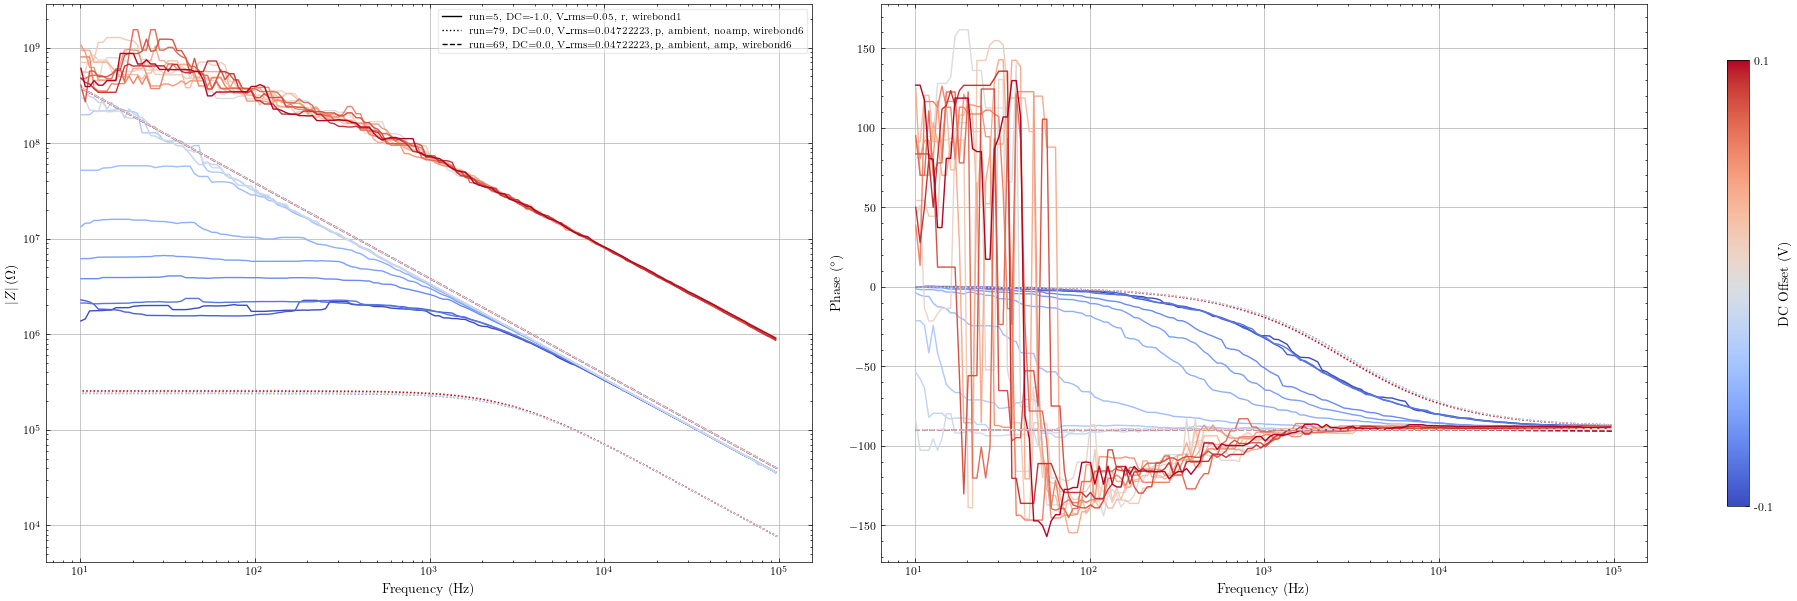

In [3]:
# Select data 
d5 = [solatron[5],solatron[79],solatron[69]]
# extract a single DC level from the data
#d5 = extract_single_dc(d5, DC_val=-0.8)

# Labels
plot_labels = ['wb1, pristine, ambient'] # label for the legend
plot_filename = 'wb1_pristine_Vdc_ambient_instability' # name for exported figure
plot_title = 'Vdc Instability in Pristine Device' # title for powerpoint

# Notes
notes = ['This was before the Au contact issue was realised, likely the cause of the low C state',
         'The device is clearly e-forming during the vDC sweep'] # notes for the powerpoint in text box

# if export true, update the plot string
d5 = update_plot_string(d5, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d5, d_type='Zabsphi', freq_lim=[1e1, 1e5],
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 7, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Pristine

### Wirebond 3: Ambient vs Vacuum
- run 51: wirebond3, ambient
- run 52: wirebond3, vacuum

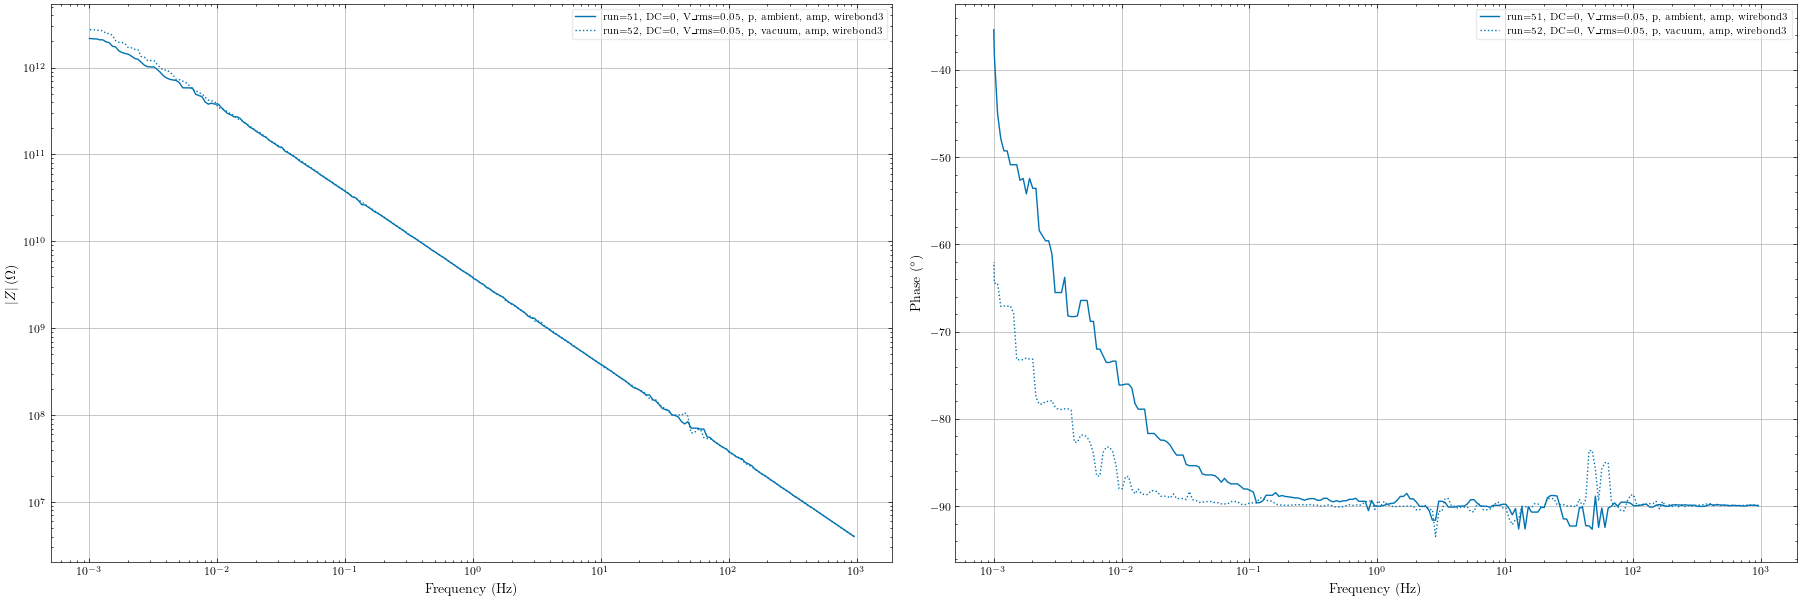

In [4]:
# Select data 
d51 = [solatron[51], solatron[52]]

# Labels
plot_labels = ['wb3, pristine, ambient', 'wb3, pristine, vacuum'] # label for the legend
plot_filename = 'wb3_pristine_ambvac' # name for exported figure
plot_title = 'Ambient vs Vacuum for Pristine Device - WB3' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d51 = update_plot_string(d51, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d51, d_type='Zabsphi', freq_lim=[0, 1e3],
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 3, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Wirebond 4: Ambient vs Vacuum with V_rms varied
- run 55: wirebond4, ambient
- run 56: wirebond4, vacuum
- run 58: wirebond4, vacuum
- run 59: wirebond4, ambient

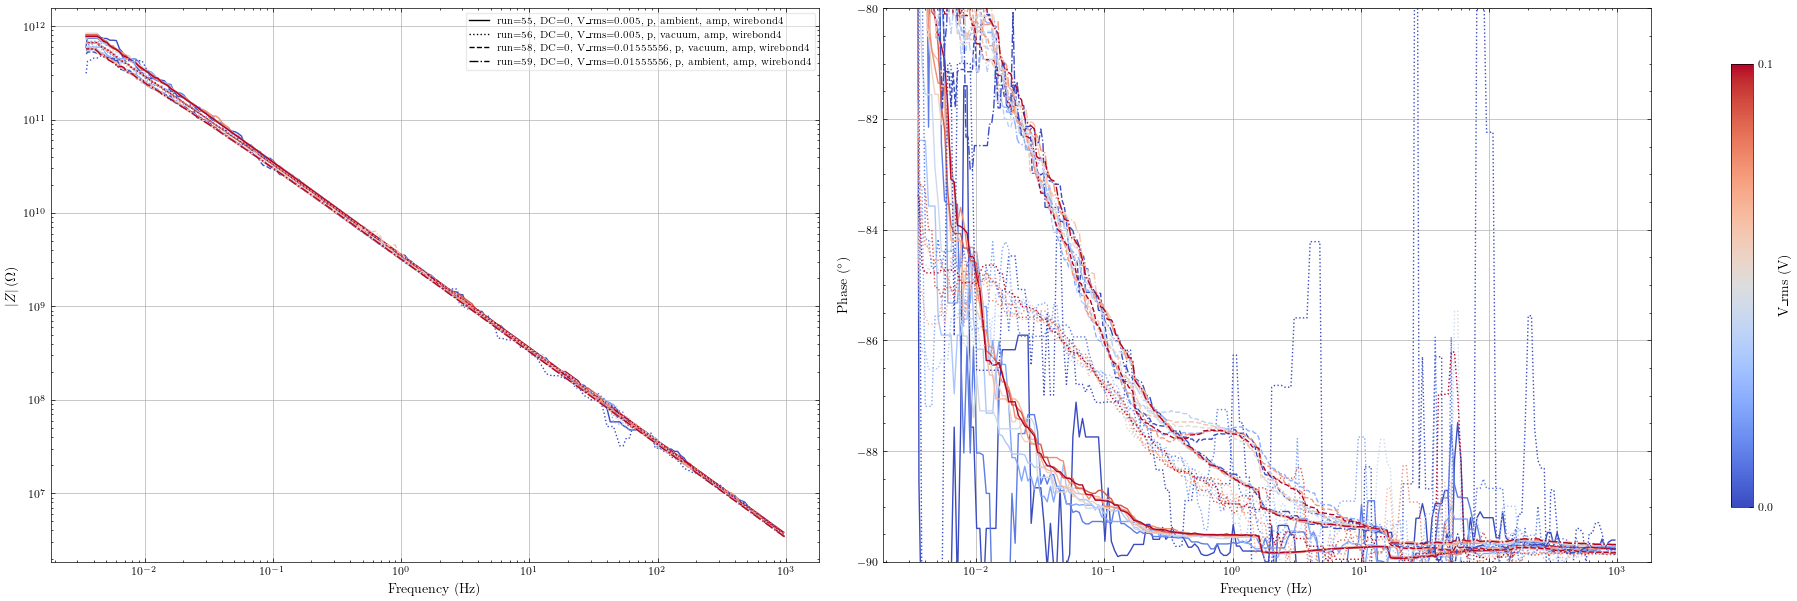

In [5]:
# Select data 
d55 = [solatron[55], solatron[56], solatron[58], solatron[59]]

# Labels
plot_labels = ['wb4, pristine, ambient', 'wb4, pristine, vacuum', 'wb4, pristine, vacuum', 'wb4, pristine, ambient'] # label for the legend
plot_filename = 'wb4_pristine_Vrms_ambvac' # name for exported figure
plot_title = 'Vrms in Ambient vs Vacuum for Pristine Device - WB4' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d55 = update_plot_string(d55, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d55, d_type='Zabsphi', freq_lim=[0, 1e3], y_lim_right=[-90, -80],
                    sort_data=False, c_bar=3, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Wirebond 4/Wirebond 3: Ambient vs Vacuum with $V_{DC}$
- r60 = wirebond4, vac
- r61 = wirebond4, ambient
- r62 = wirebond3, ambient
- r63 = wirebond3, vac

- Notice that the wirebond 3 has zero phase and infinite resistance
    - This will later prove that **this device won't form**

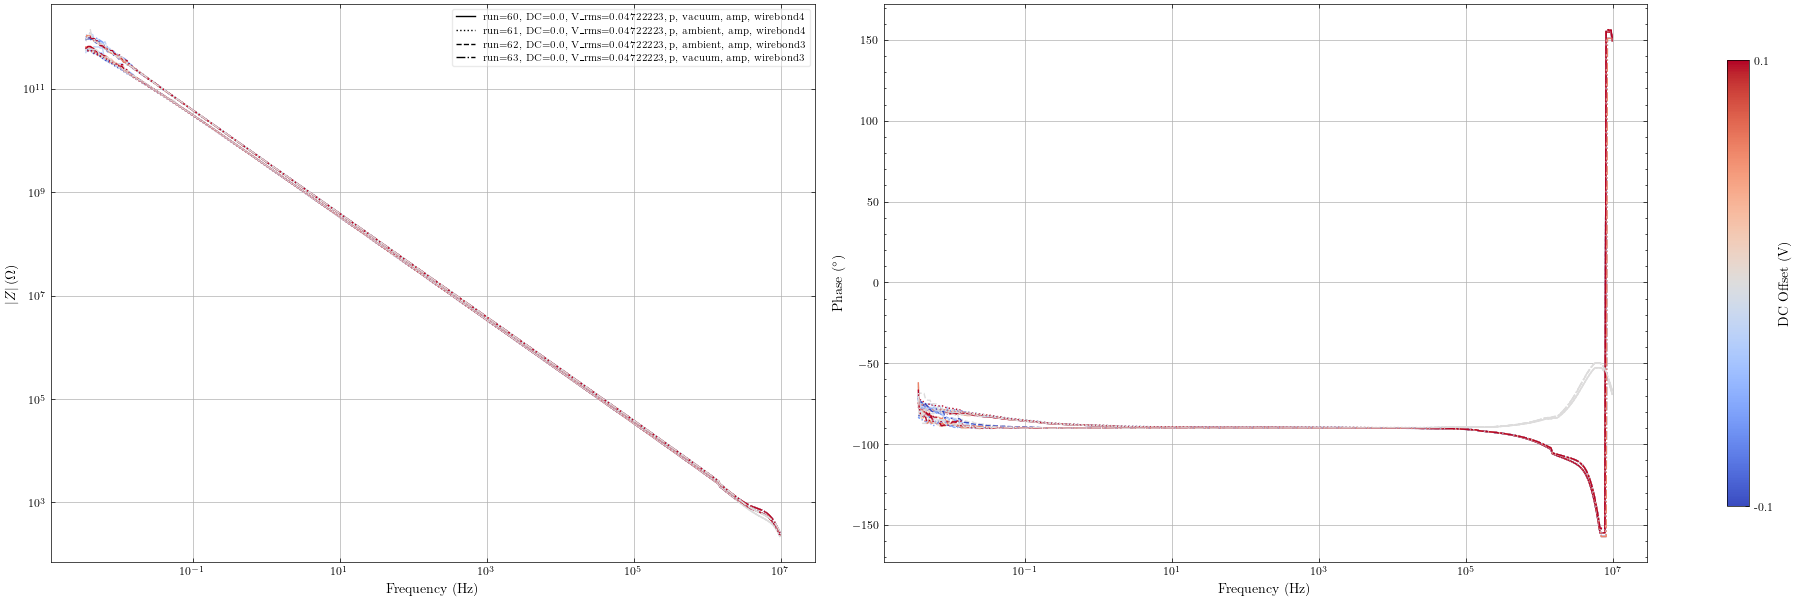

In [6]:
# Select data 
d60 = [solatron[60], solatron[61],solatron[62], solatron[63]]

# Labels
plot_labels = ['wb4, pristine, vacuum', 'wb4, pristine, ambient', 'wb3, pristine, ambient', 'wb3, pristine, vacuum'] # label for the legend
plot_filename = 'wb4wb3_pristine_Vdc_ambvac' # name for exported figure
plot_title = 'Vdc in Ambient vs Vacuum for Pristine Devices - wb3wb4' # title for powerpoint

# Notes
notes = ['- Notice that the wirebond 3 has zero phase and infinite resistance',
        'This will later prove that this device wont form'] # notes for the powerpoint in text box

# if export true, update the plot string
d60 = update_plot_string(d60, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d60, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### On/Off/Pristine - Across Different Runs

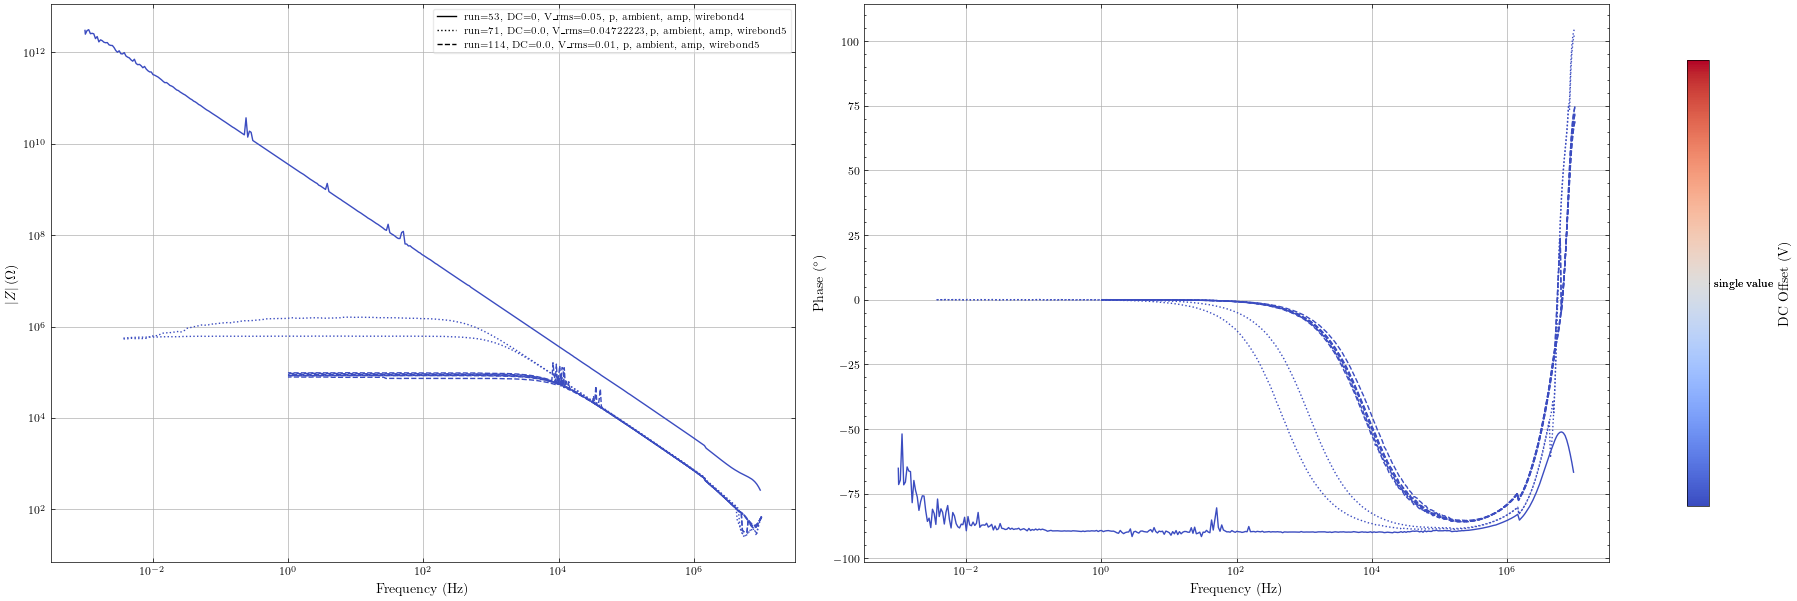

In [7]:
# Select data 
d60 = [solatron[53], solatron[71], solatron[114]]

d60 = extract_single_dc(d60, DC_val=0)
# Labels
plot_labels = ['wb4, pristine, ambient', ''] # label for the legend
plot_filename = 'wb4wb3_pristine_Vdc_ambvac' # name for exported figure
plot_title = 'Vdc in Ambient vs Vacuum for Pristine Devices - wb3wb4' # title for powerpoint

# Notes
notes = ['This is problematic as the Vrms is different for run71'] # notes for the powerpoint in text box

# if export true, update the plot string
d60 = update_plot_string(d60, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d60, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### SAME DEVICE Pristine vs Formed


--- Starting Fit for: run=79, DC=0.0, V_rms=0.04722223, p, ambient, noamp, wirebond6 ---
Using model: RC
Frequency range: (0, 5000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'C_pad', 'R_series']
550 points after frequency filtering.
Applying median filter (k=5)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(254661.515625), 'C_mem1': np.float64(1.9844202705452987e-10), 'C_pad': np.float64(2.0659598803404272e-11), 'R_series': np.float64(20.116865793517718)}
  DE Final Cost: 8.5771e-01

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 4.2887e-01
  Final Fitted Parameters:
    R_mem1: 2.5466e+05
    C_mem1: 1.9918e-10
    C_pad: 2.0023e-11
    R_series: 2.0117e+01
Stored fitted parameters in data_obj.Z_parameters
Stored extrapolated fit curve in data_obj.Zcomplex_fit


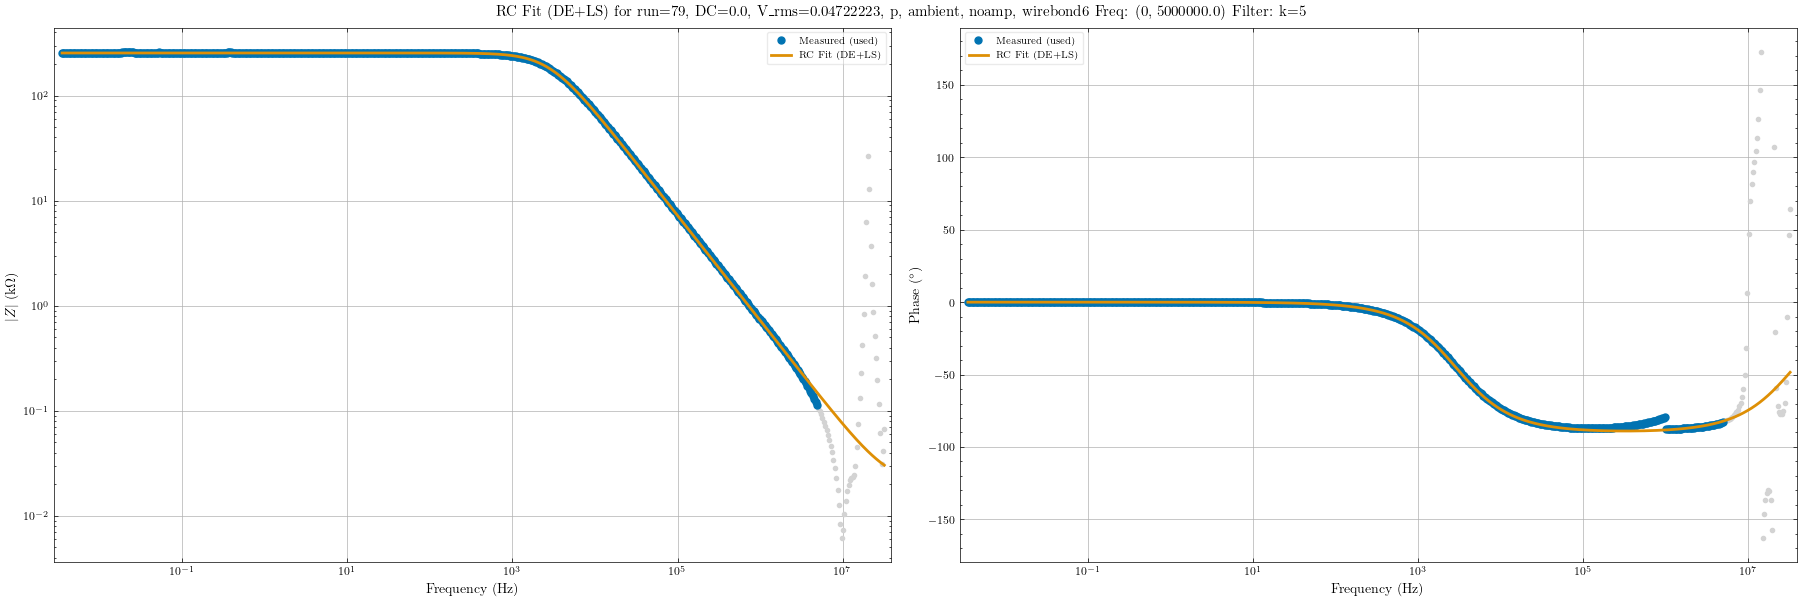


Final Fitted Parameters Dictionary:
{'R_mem1': np.float64(254661.51563820045), 'C_mem1': np.float64(1.9918217772460578e-10), 'C_pad': np.float64(2.0022526160226022e-11), 'R_series': np.float64(20.116865793517718)}
--- Fit finished for: run=79, DC=0.0, V_rms=0.04722223, p, ambient, noamp, wirebond6 ---


In [8]:
# --- Settings ---
fit_settings = {
    'model_type': 'RC', # String: 'RC', 'CPE', 'RC2', or 'CPE2'
    'freq_bounds': (0, 5e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 5, # Median filter kernel (or 0/None to skip)
    #'fixed_params': {'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict' :{'R_mem1': (1e1, 1e14), 'C_mem1': (1e-13, 1e-9),'R_mem2': (1e1, 1e14), 'C_mem2': (1e-13, 1e-11),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)},
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 60000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 3000 # Max function evaluations for Least Squares. Increase if refinement terminates early.
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']

# --- Select Data ---
# Select data 
dfit = [solatron[79][0]] #[solatron[5]]
# extract a single DC level from the data
#dfit = extract_single_dc(dfit, DC_val=0)
data_to_fit = dfit[0] # Get the ISdata object


# --- Run Fit ---
fig, ax = fit_impedance_data(data_to_fit, **fit_settings)

# --- Parameter for Plot Exports ---
# Labels
plot_labels = [' r69'] # label for the legend
plot_filename = ' r69' # name for exported figure
plot_title = 'Trial fitting' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
dfit = update_plot_string(dfit, export_data=export_data, plot_labels=plot_labels)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 


In [9]:
print("siox",(8.854e-12*4*(20e-6)**2)/(25e-9) )
pad_area = (40000+1719.0-12.5)*1e-12
print("pad", (8.854e-12*7*pad_area)/((110+25)*1e-9) )

print("formed",(8.854e-12*40*(20e-6)**2)/(1e-9) )



siox 5.66656e-13
pad 1.9147299681481476e-11
formed 1.4166400000000001e-10


/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


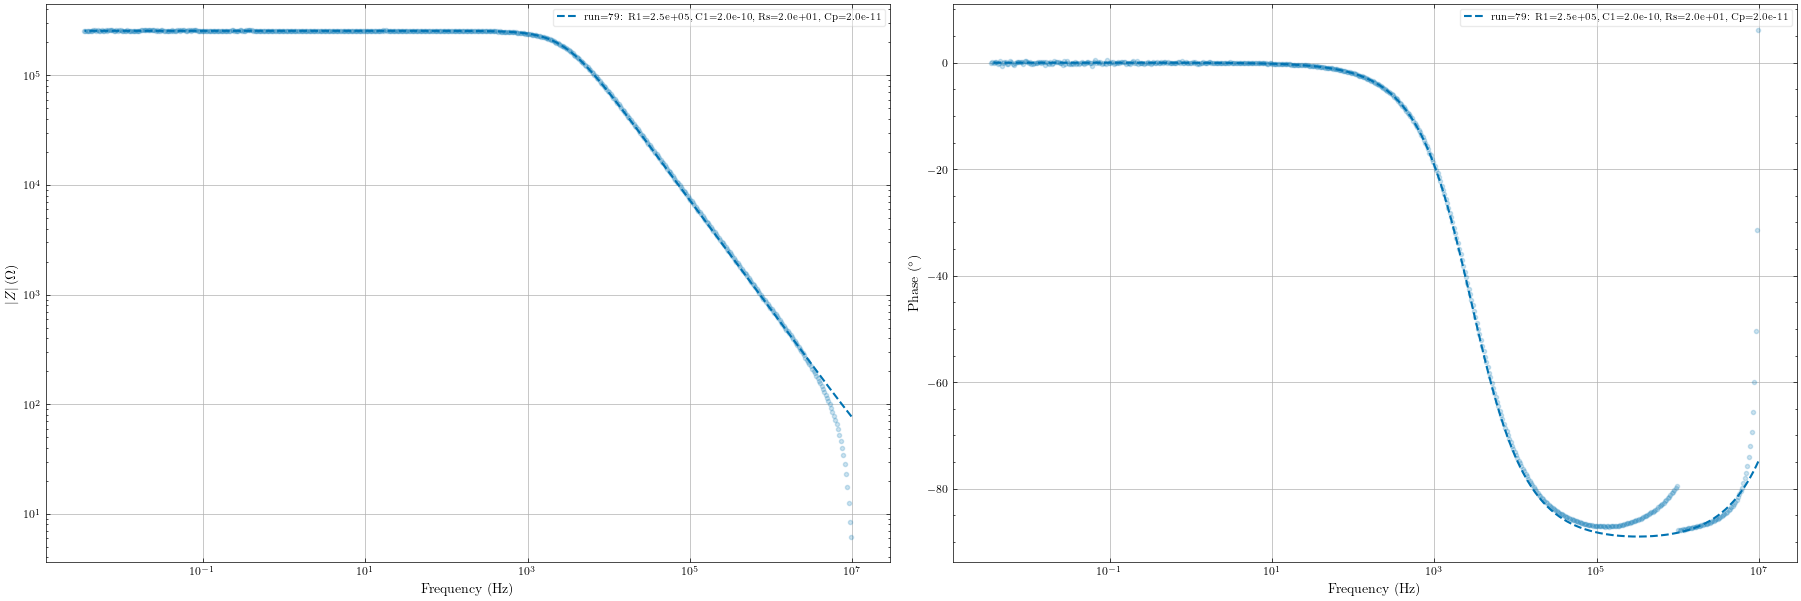

In [10]:
# Select data 
d69 = [solatron[79]] #

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d69, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 1, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

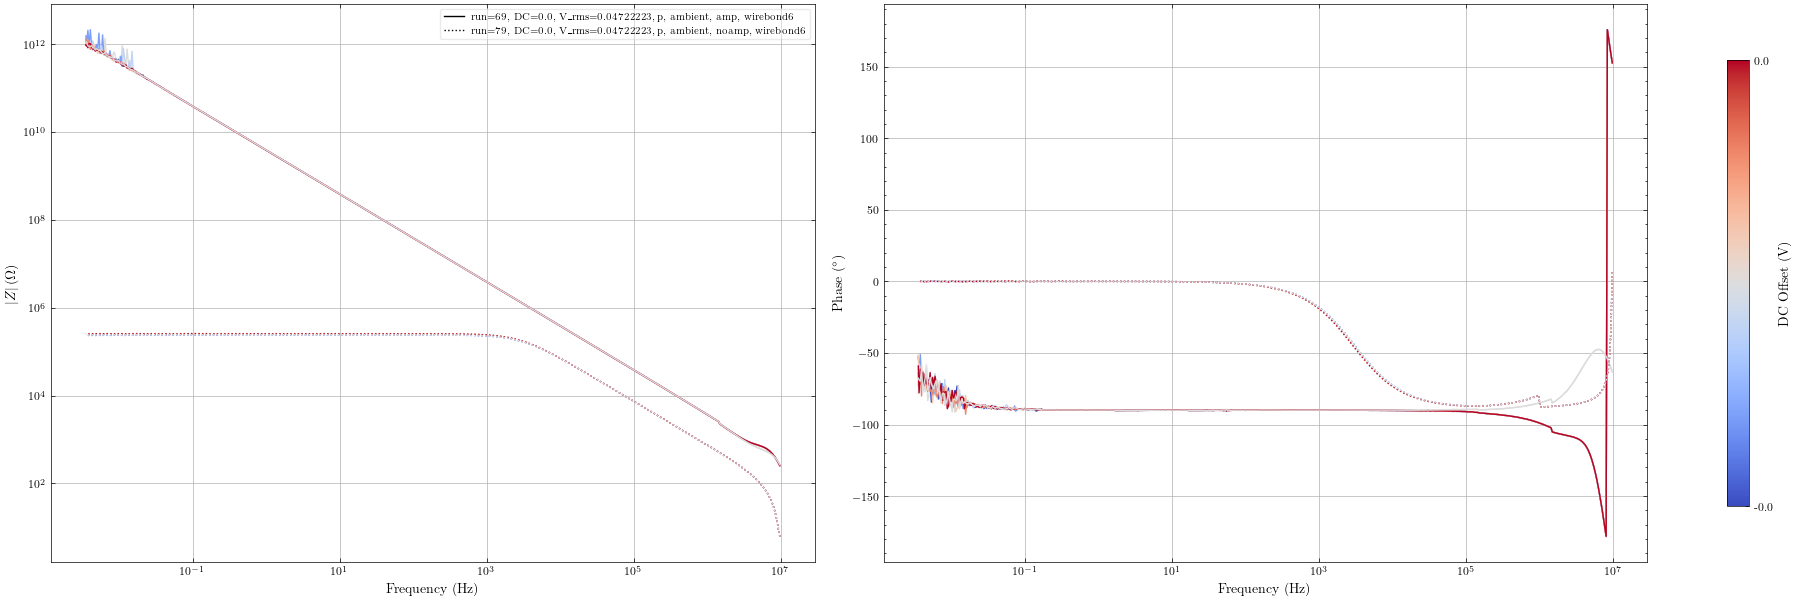

In [11]:
# Select data 
d69 = [solatron[69], solatron[79]] #

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d69, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live DC Switching

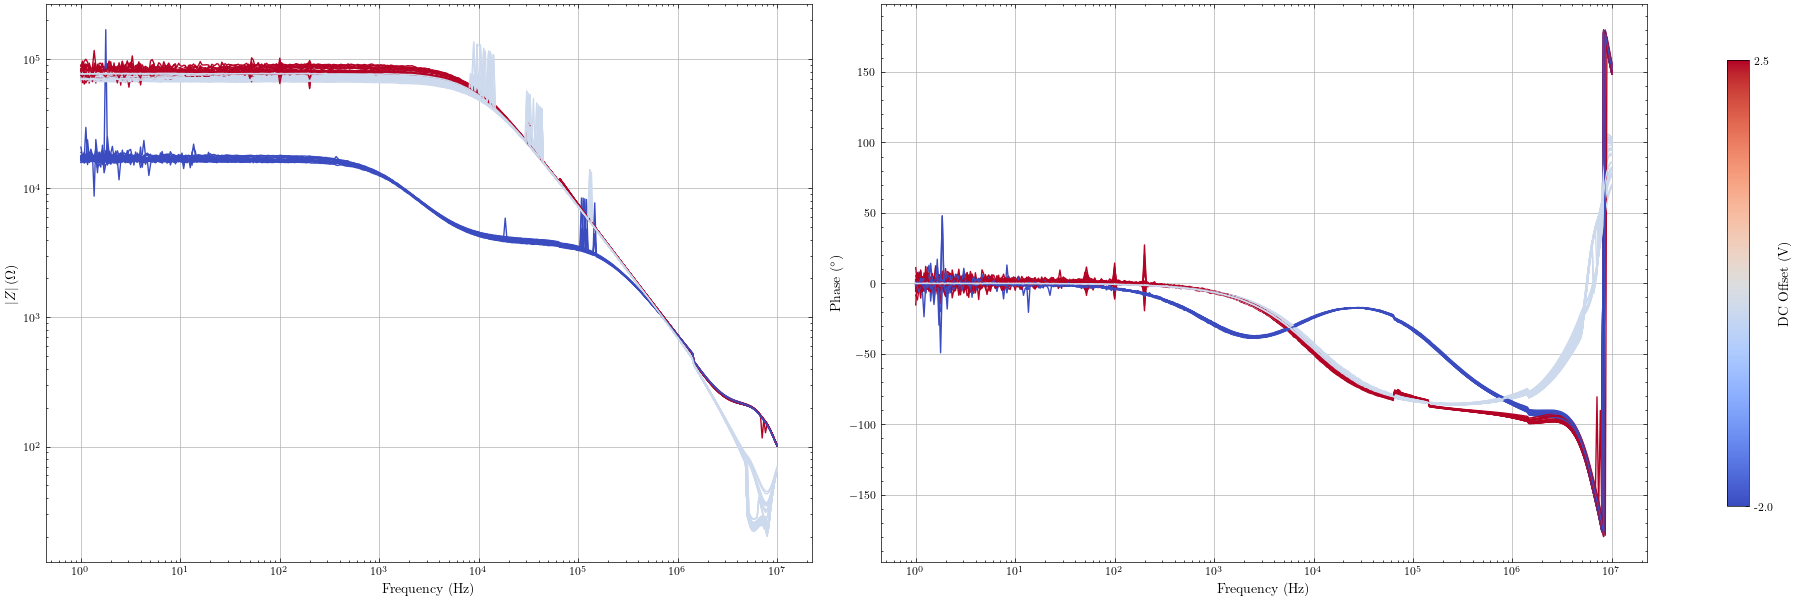

In [12]:
# Select data 
d = [solatron[115]] #

# Labels
plot_labels = ['wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching' # name for exported figure
plot_title = 'Switching Device with DC Offset' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live Switching Ambient vs Vacuum

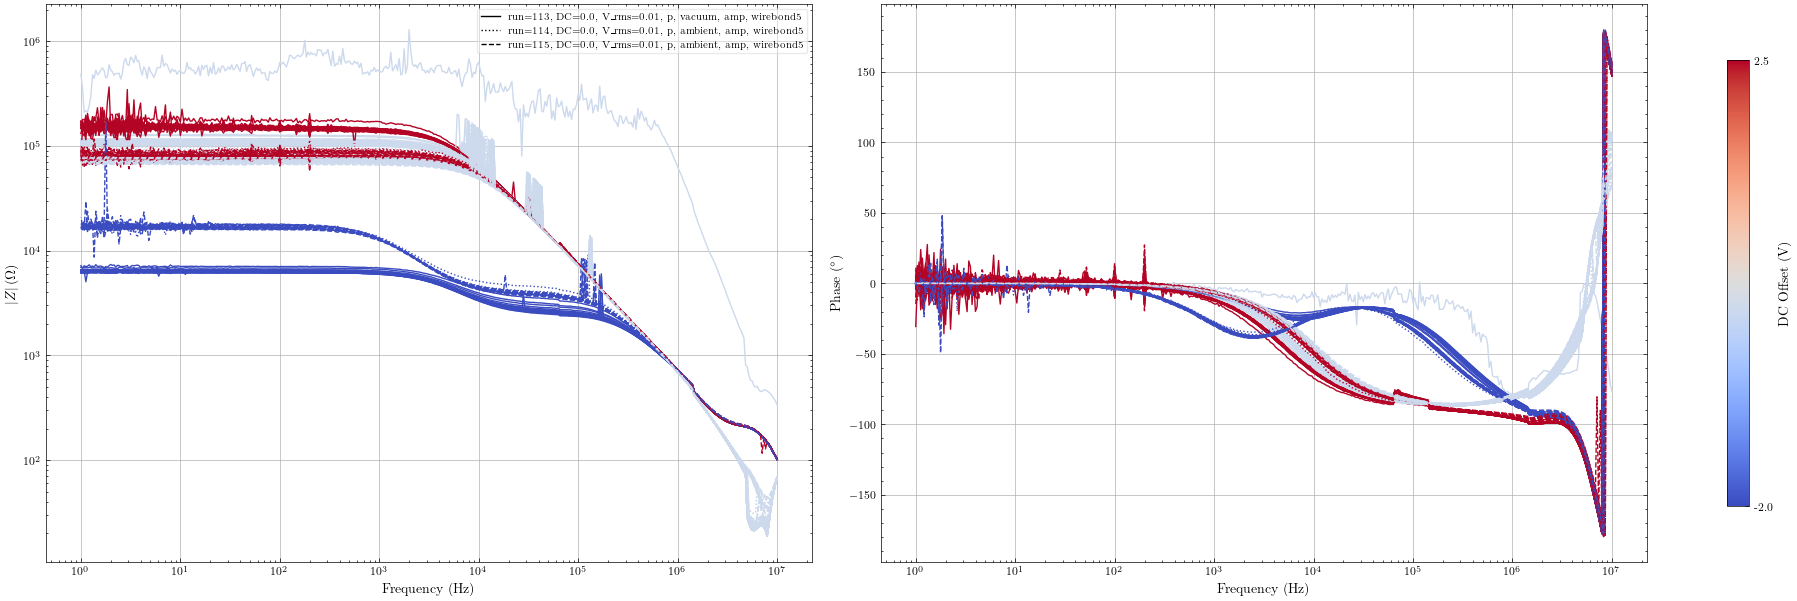

In [13]:
# Select data 
d = [solatron[113],solatron[114],solatron[115]] 
# extract a single DC level from the data
#d = extract_single_dc(d, DC_val=0)

# Labels
plot_labels = ['wb5, formed, vacuum', 'wb5, formed, ambient-failed', 'wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching_ambvsvac' # name for exported figure
plot_title = 'Switching Device with DC Offset in Vacuum and Ambient' # title for powerpoint

# Notes
notes = ['All runs use a loop [0, 2.5V, 0, -2V] to measure state then switch ON/OFF then measure state'
        'Vacuum was left at 9e-7 for 3 days before starting the run',
         'First ambient run was started after 7 hours at ambient but crashed part way through',
         'Second ambient run was started 2 days after the vacuum and completed successfully',
         ] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

### Live Switching: Ambient vs Vacuum with Looped $V_{DC}$ sweep -> Gives Many Resistance States with DC=0

/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


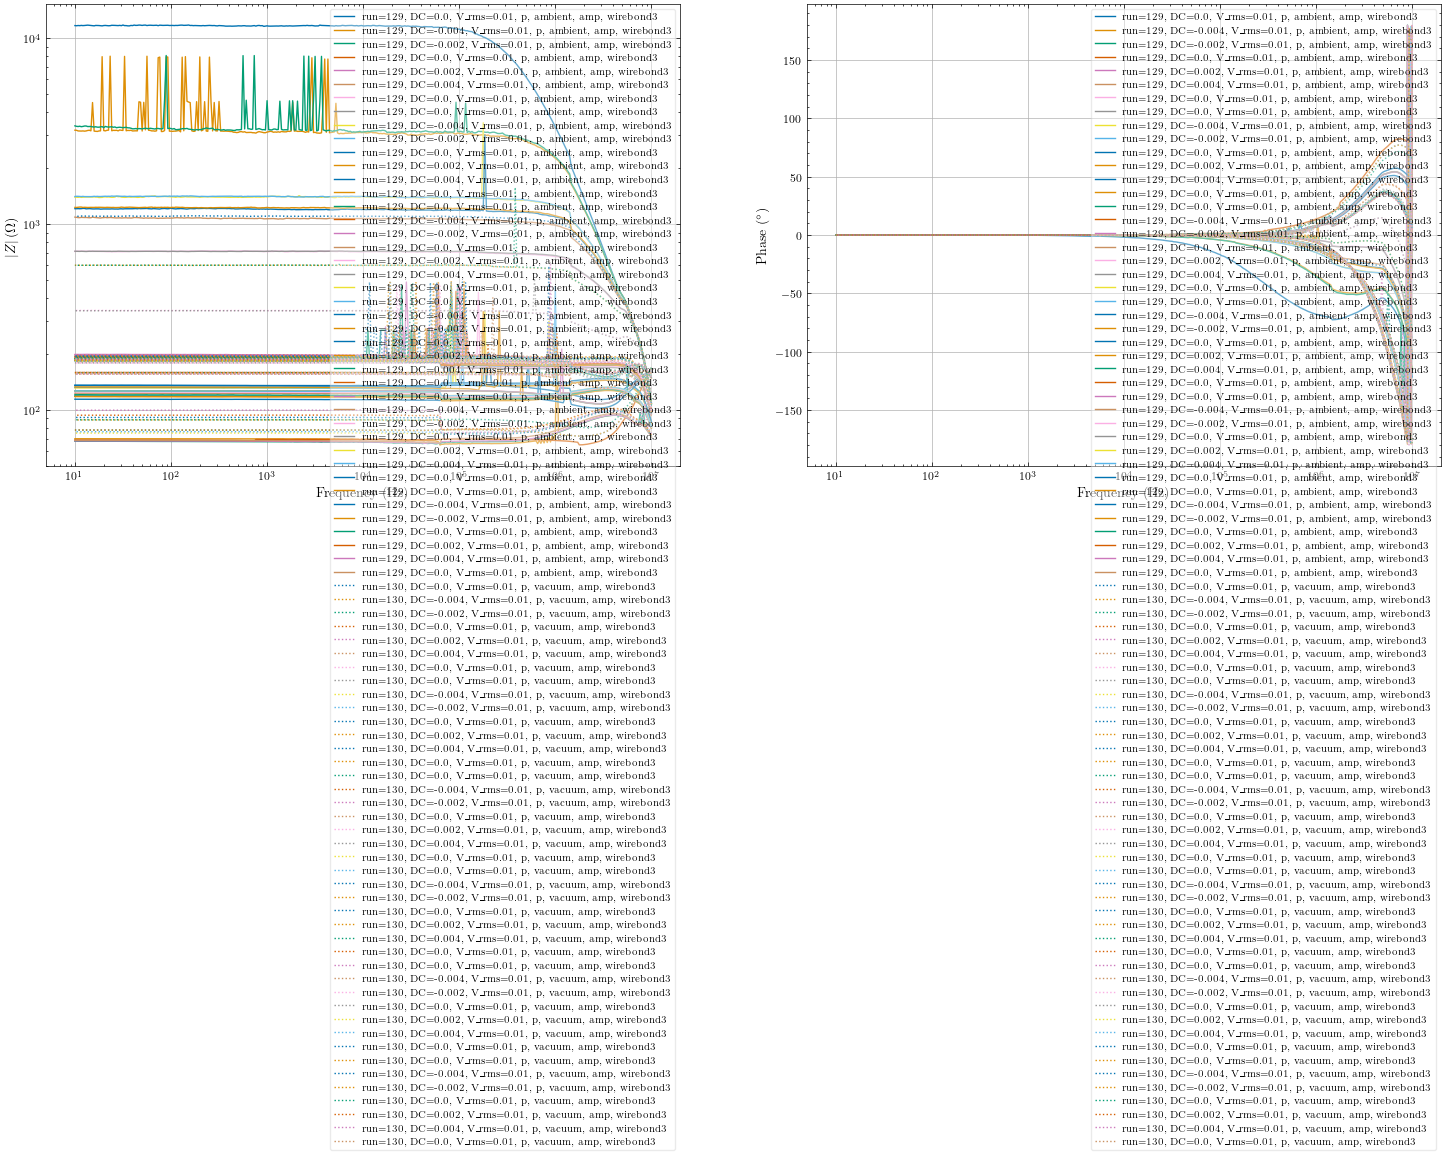

In [14]:
# Select data 
d = [solatron[129],solatron[130]] 
# Extract a single DC offset from the data
d = extract_single_dc(d, DC_val=0)

# Labels
plot_labels = ['wb5, formed, vacuum', 'wb5, formed, ambient-failed', 'wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching_ambvsvac' # name for exported figure
plot_title = 'Switching Device with DC Offset in Vacuum and Ambient' # title for powerpoint

# Notes
notes = [''
         ] # notes for the powerpoint in text box

# if export true, update the plot string
d = update_plot_string(d, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Ambient vs Vacuum Stable Changes

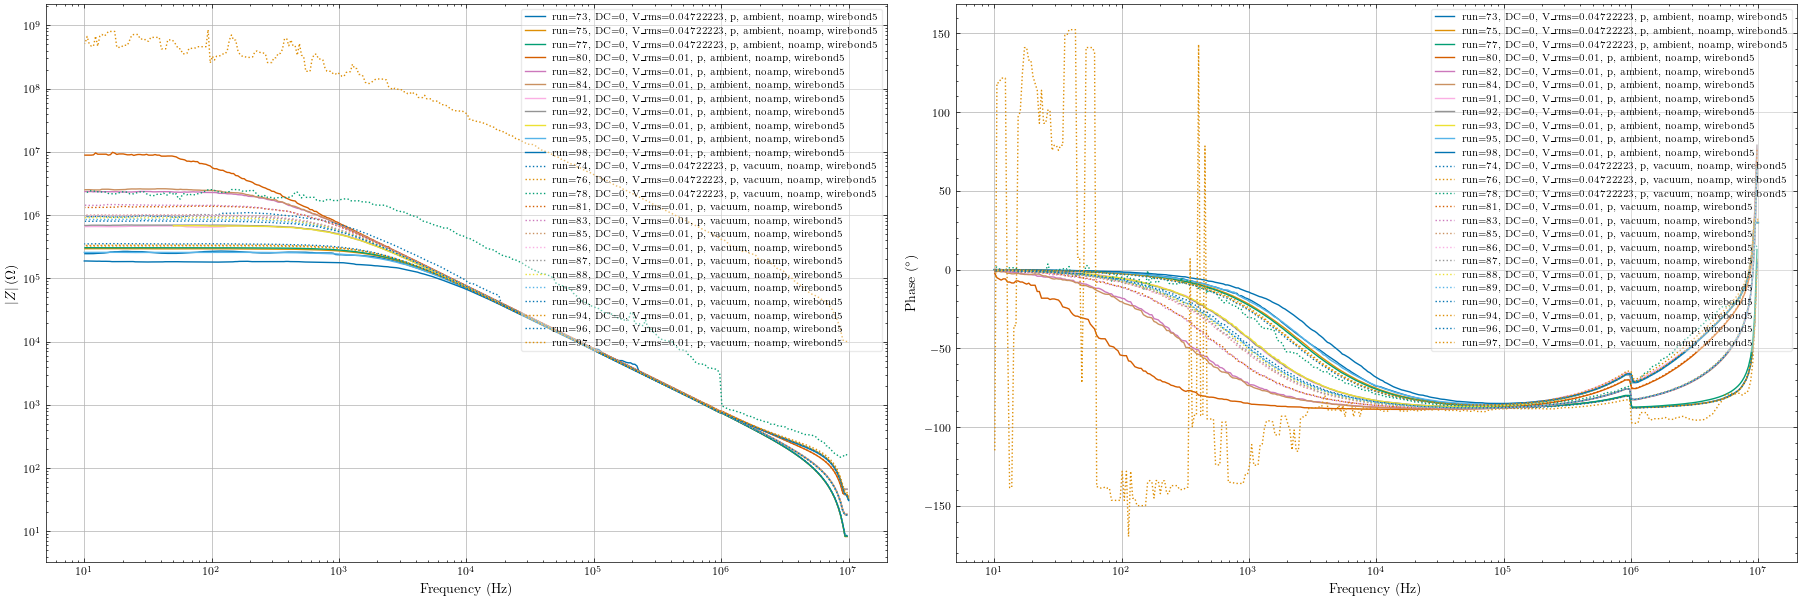

In [15]:
# Select data 
d73 = [ [solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ],  [solatron[74][0], solatron[76][0],solatron[78][0], solatron[81][0], solatron[83][0], solatron[85][0], solatron[86][0], solatron[87][0], solatron[88][0], solatron[89][0], solatron[90][0], solatron[94][0], solatron[96][0], solatron[97][0]] ] #

# Labels
plot_labels = ['wb5, formed, ambient'] # label for the legend
plot_filename = 'wb5_liveswitching' # name for exported figure
plot_title = 'Switching Device with DC Offset' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d73 = update_plot_string(d73, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d73, d_type='Zabsphi', freq_lim=[1e1, 1e7], y_lim_right=None,
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 5, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 


--- Starting Fit for: run=73, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
508 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(258339.4765625), 'C_mem1': np.float64(1.9348426336505804e-10), 'R_series': np.float64(142.93693808612716)}
  DE Final Cost: 6.1499e-01

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 3.0750e-01
  Final Fitted Parameters:
    R_mem1: 2.5834e+05
    C_mem1: 1.9348e-10
    C_pad: 1.9147e-11
    R_series: 1.4294e+02
Stored fitted parameters in data_obj.Z_parameters
Stored extrapolated fit curve in data_obj.Zcomplex_fit


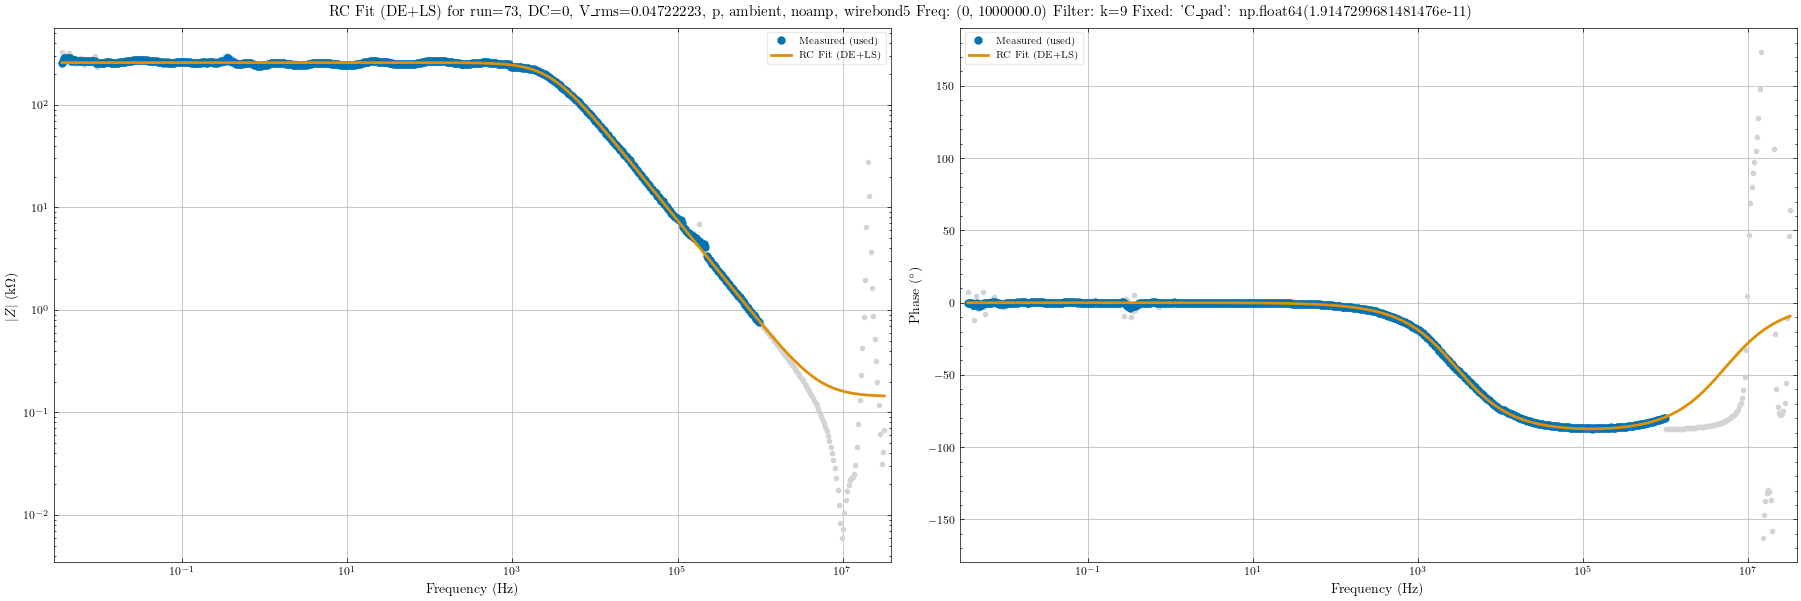


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(258339.4765625), 'C_mem1': np.float64(1.9348426336505804e-10), 'R_series': np.float64(142.93693808612716)}
--- Fit finished for: run=73, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=75, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
508 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(300011.984375), 'C_mem1': np.float64(1.9746148018323145e-10), 'R_series': np.float64(142.54752159494)}
  DE Final Cost: 5.2931e-01

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 2.646

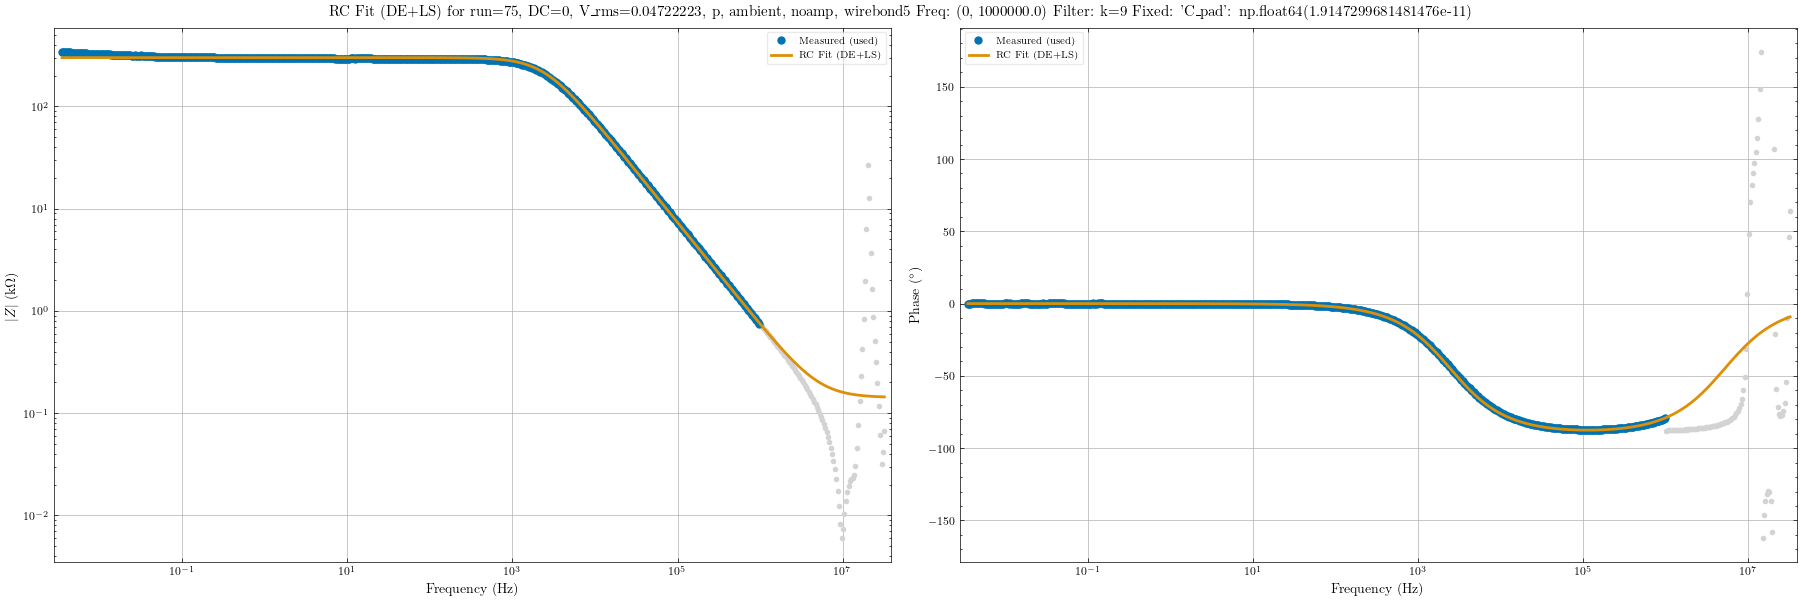


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(300011.984375), 'C_mem1': np.float64(1.9746148018323145e-10), 'R_series': np.float64(142.54752159494)}
--- Fit finished for: run=75, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=77, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
508 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(10.0), 'C_mem1': np.float64(8.143493148480288e-10), 'R_series': np.float64(1.0000015024215827)}
  DE Final Cost: 8.4417e+08

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 4.2208e+08
  Fin

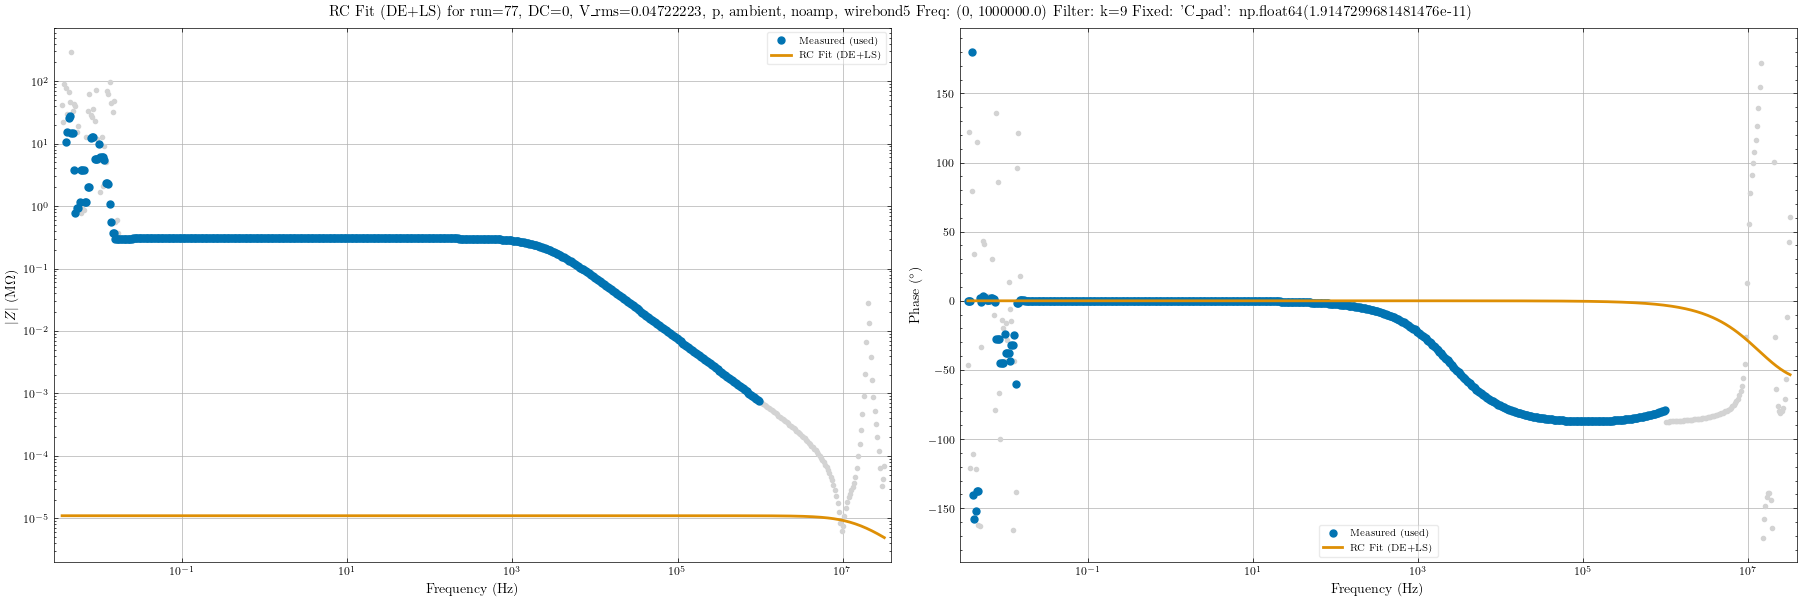


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(10.000000000000002), 'C_mem1': np.float64(9.999999999999078e-10), 'R_series': np.float64(1.0000000000000002)}
--- Fit finished for: run=77, DC=0, V_rms=0.04722223, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=80, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(23088178322.914062), 'C_mem1': np.float64(9.998957875469402e-10), 'R_series': np.float64(523.1935004096749)}
  DE Final Cost: 4.8901e+03

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 6.

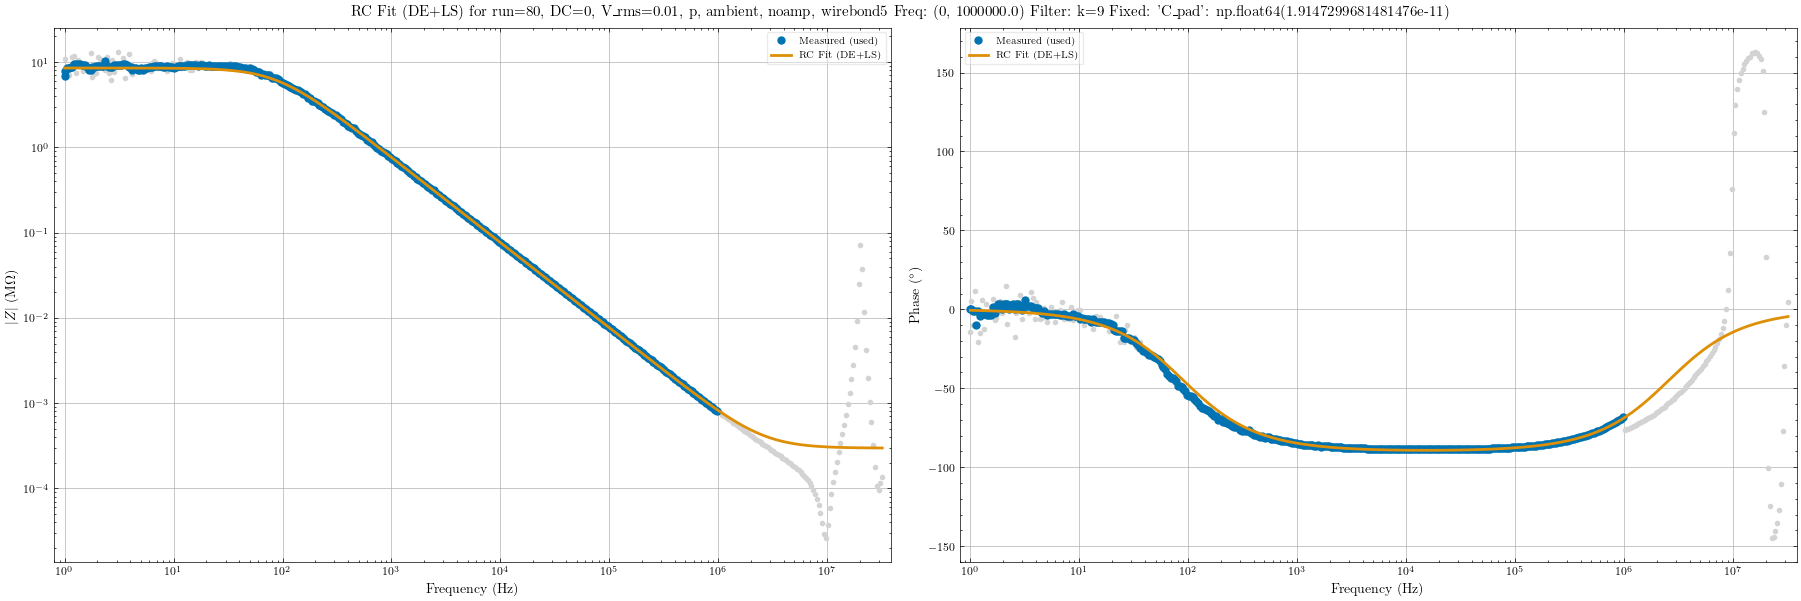


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(8506069.846274093), 'C_mem1': np.float64(1.8865649763853916e-10), 'R_series': np.float64(297.34774977415725)}
--- Fit finished for: run=80, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=82, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(4553064481840.844), 'C_mem1': np.float64(9.999999084814435e-10), 'R_series': np.float64(246.1613180463719)}
  DE Final Cost: 6.9393e+04

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 4.1170e+0

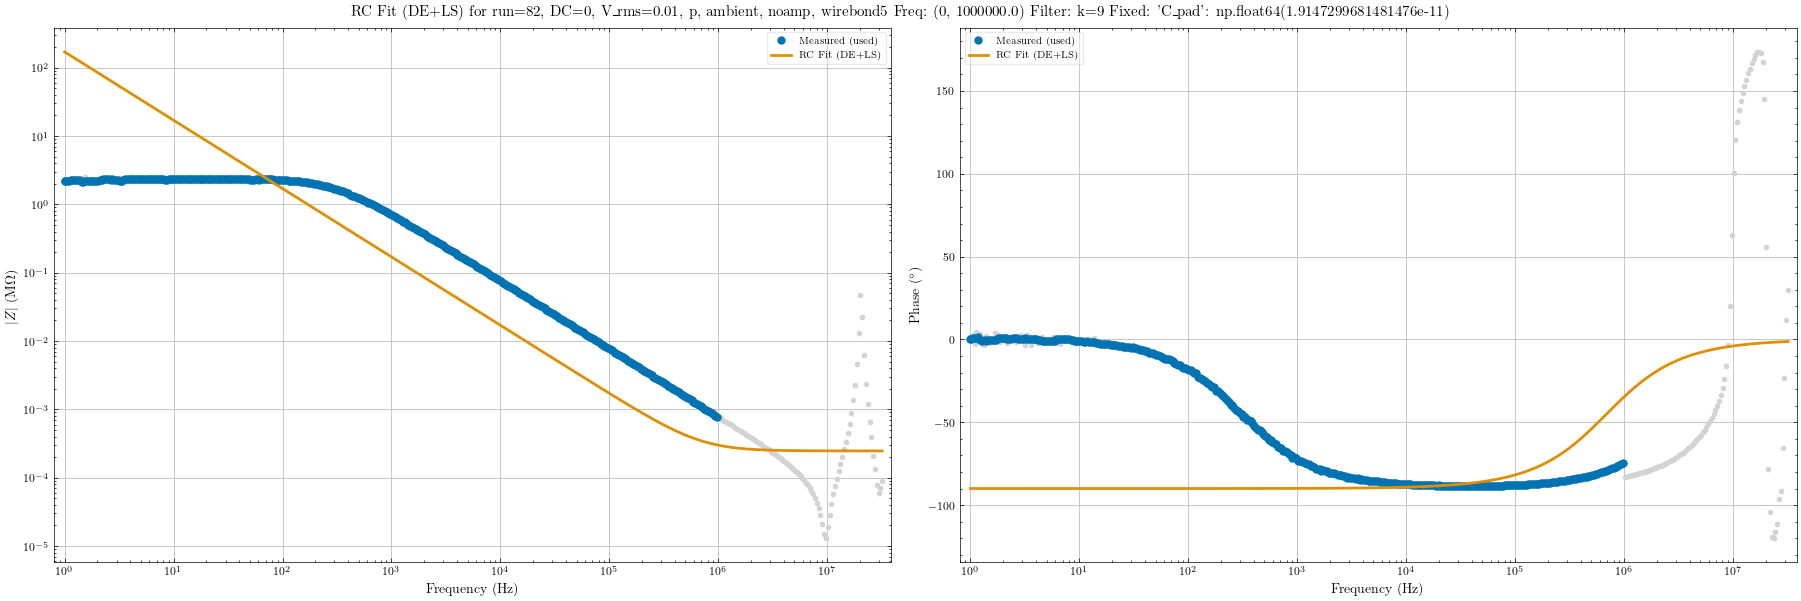


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(4553064481840.844), 'C_mem1': np.float64(9.161300019797743e-10), 'R_series': np.float64(246.1613180463719)}
--- Fit finished for: run=82, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=84, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(420083602211.03125), 'C_mem1': np.float64(9.999986470674096e-10), 'R_series': np.float64(174.134480101382)}
  DE Final Cost: 5.5897e+04

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 1.4728e-01


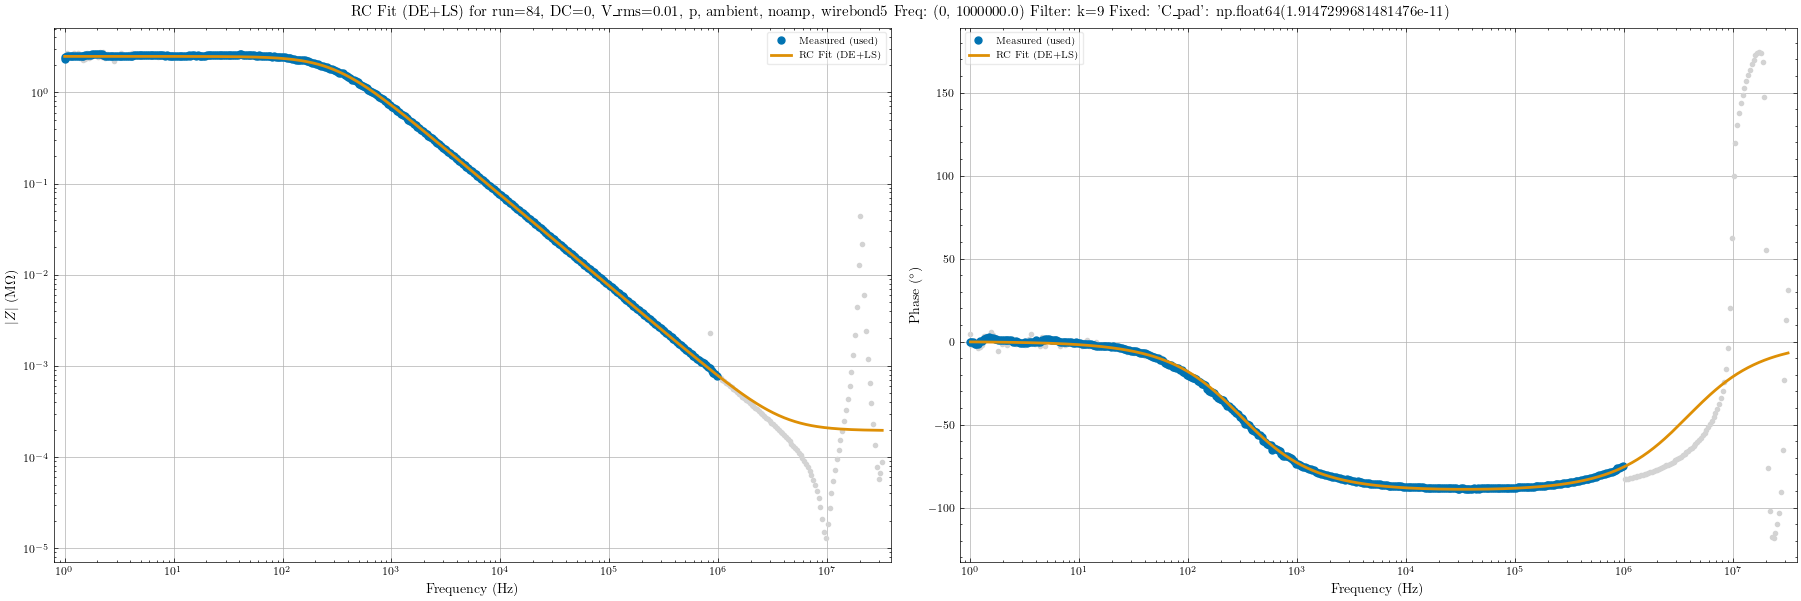


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(2477110.06269444), 'C_mem1': np.float64(1.9245422908175362e-10), 'R_series': np.float64(195.20663531534439)}
--- Fit finished for: run=84, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=91, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(12783210360.328125), 'C_mem1': np.float64(9.999855207135193e-10), 'R_series': np.float64(641.9128239223019)}
  DE Final Cost: 8.4443e+05

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 1.8183e-0

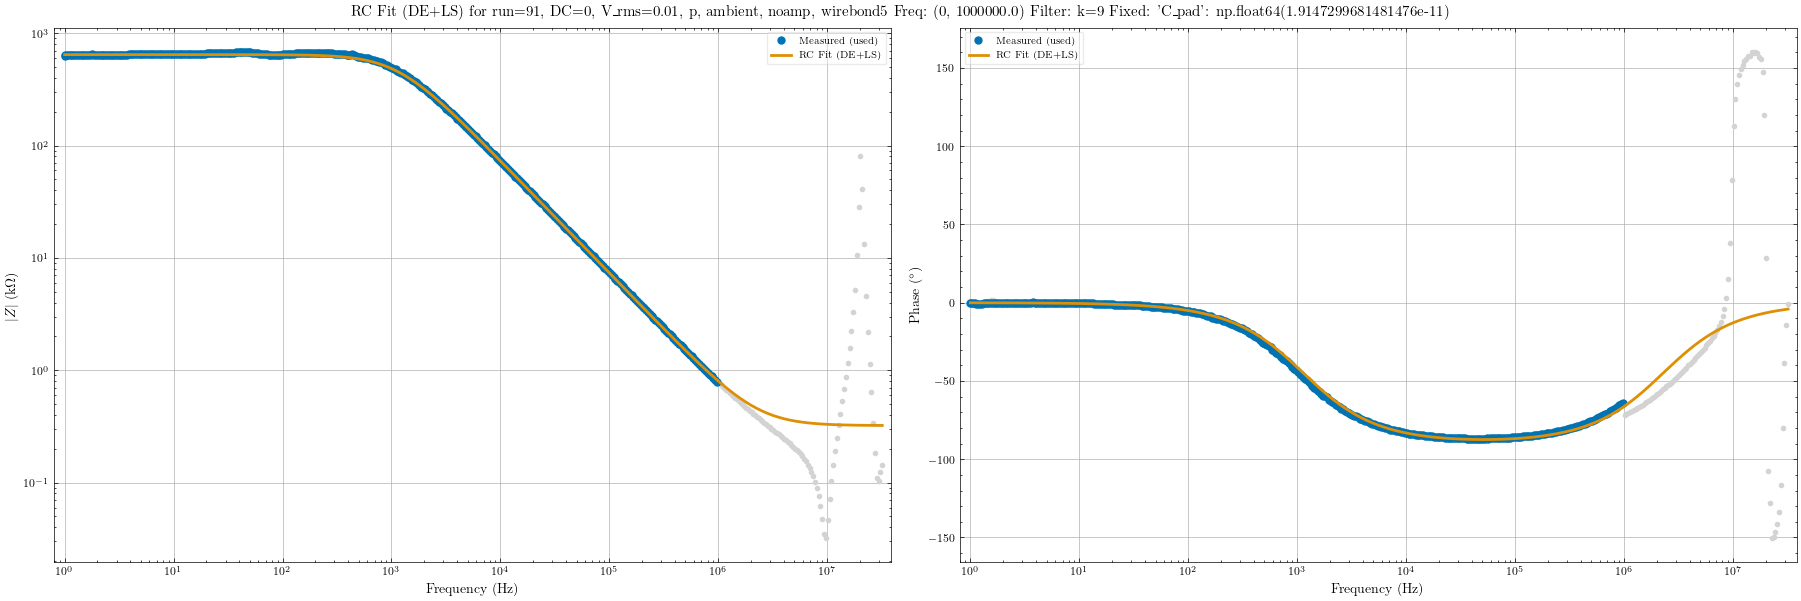


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(644885.6138896265), 'C_mem1': np.float64(1.975133961733254e-10), 'R_series': np.float64(321.72690462389244)}
--- Fit finished for: run=91, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=92, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
361 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(27860183404245.508), 'C_mem1': np.float64(9.999999569751648e-10), 'R_series': np.float64(291.9566630635454)}
  DE Final Cost: 7.5531e+05

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 4.4839e+0

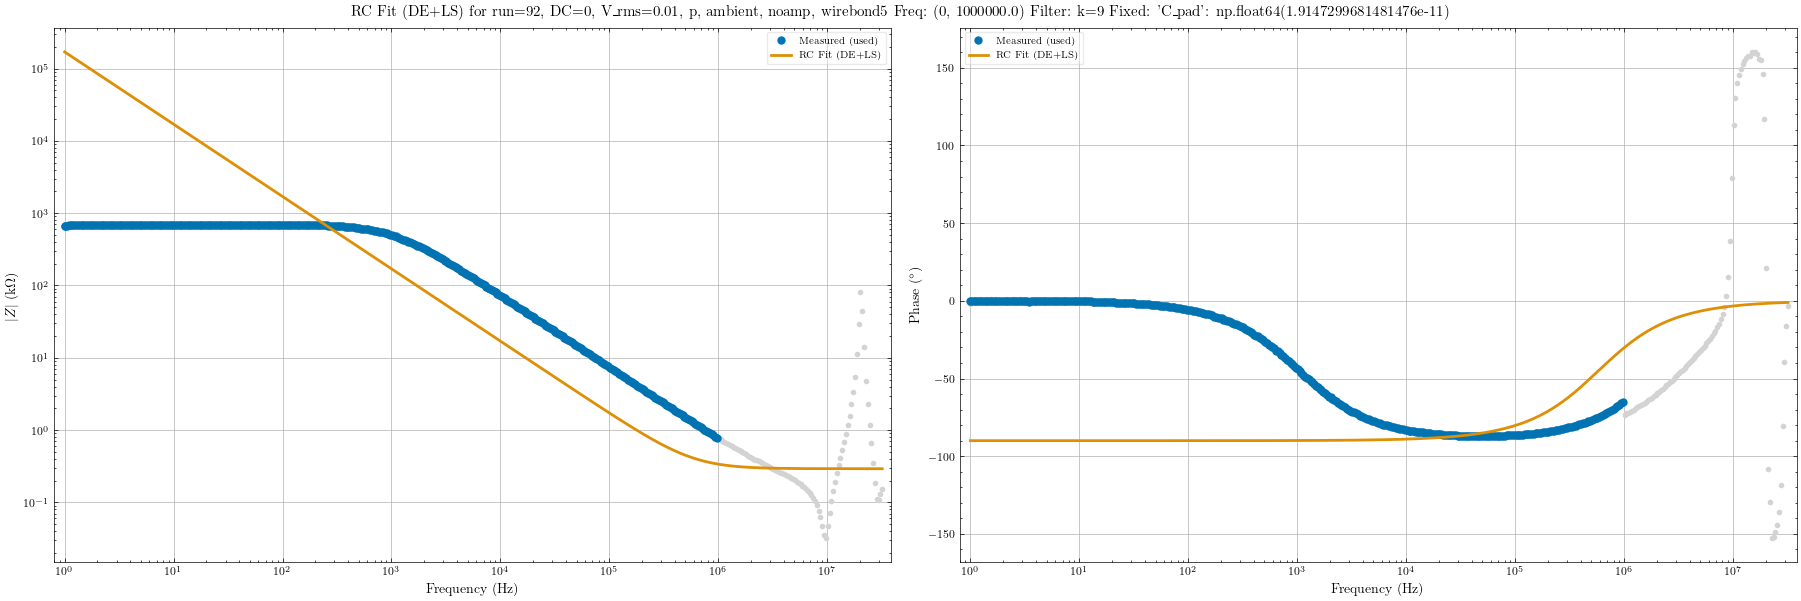


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(27860183404245.508), 'C_mem1': np.float64(9.161394314837922e-10), 'R_series': np.float64(291.9566630635454)}
--- Fit finished for: run=92, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=93, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
260 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(11075831604362.188), 'C_mem1': np.float64(9.999999936106384e-10), 'R_series': np.float64(353.66645514441643)}
  DE Final Cost: 4.6370e+02

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 2.5739e+

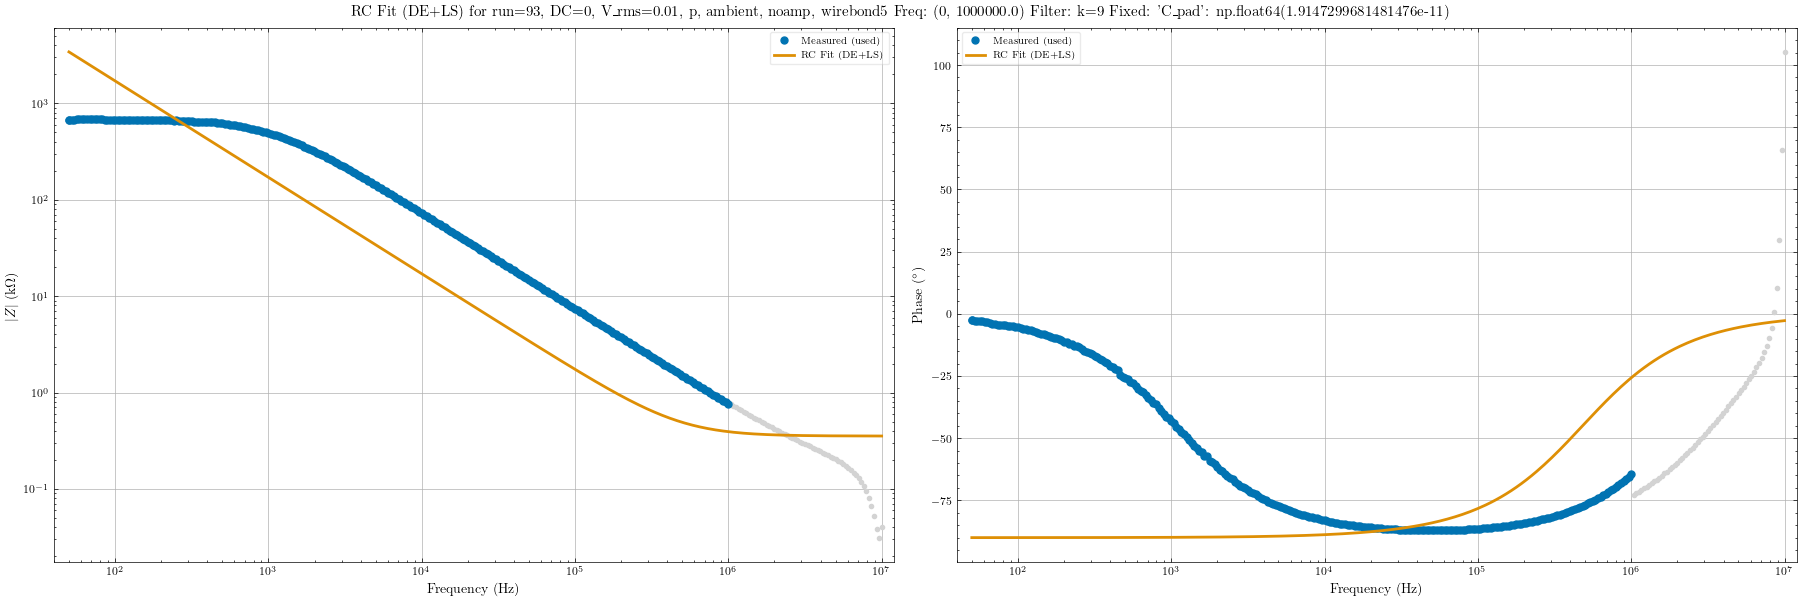


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(11075831604362.188), 'C_mem1': np.float64(9.1395020623368e-10), 'R_series': np.float64(353.66645514441643)}
--- Fit finished for: run=93, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=95, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(57994438135867.99), 'C_mem1': np.float64(9.999999113013225e-10), 'R_series': np.float64(376.18355674139184)}
  DE Final Cost: 5.0151e+04

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 2.9753e+04

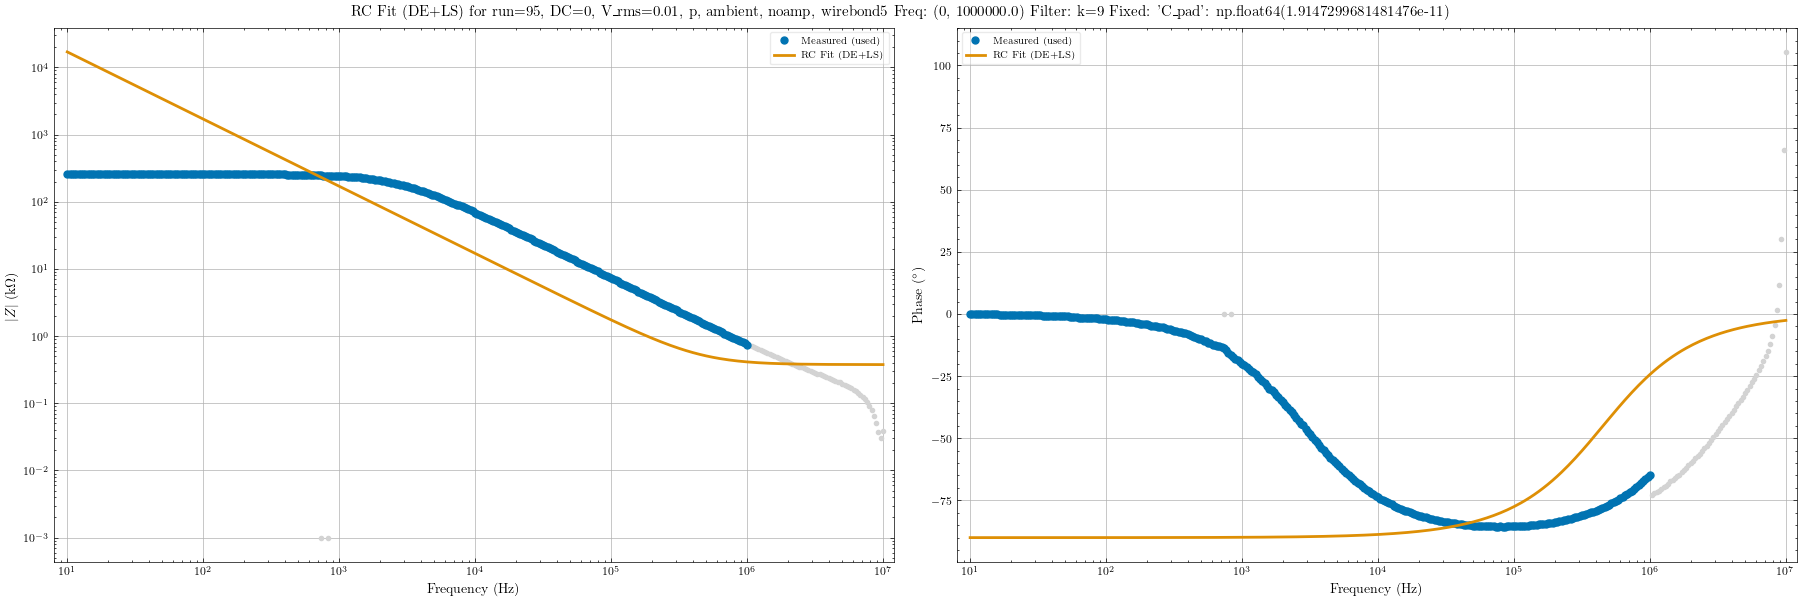


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(57994438135867.99), 'C_mem1': np.float64(9.161251875126844e-10), 'R_series': np.float64(376.18355674139184)}
--- Fit finished for: run=95, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---

--- Starting Fit for: run=98, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---
Using model: RC
With fixed params: {'C_pad': np.float64(1.9147299681481476e-11)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1', 'R_series']
301 points after frequency filtering.
Applying median filter (k=9)...
Running Differential Evolution (Stage 1)...
DE finished successfully.
  DE Best Params (Free): {'R_mem1': np.float64(41829615501804.195), 'C_mem1': np.float64(9.999997657104712e-10), 'R_series': np.float64(382.32826428363023)}
  DE Final Cost: 9.6283e+04

Running Least Squares Refinement (Stage 2)...
Least Squares refinement successful!
  LS Final Cost (0.5*sum(sq_resid)): 5.7141e+

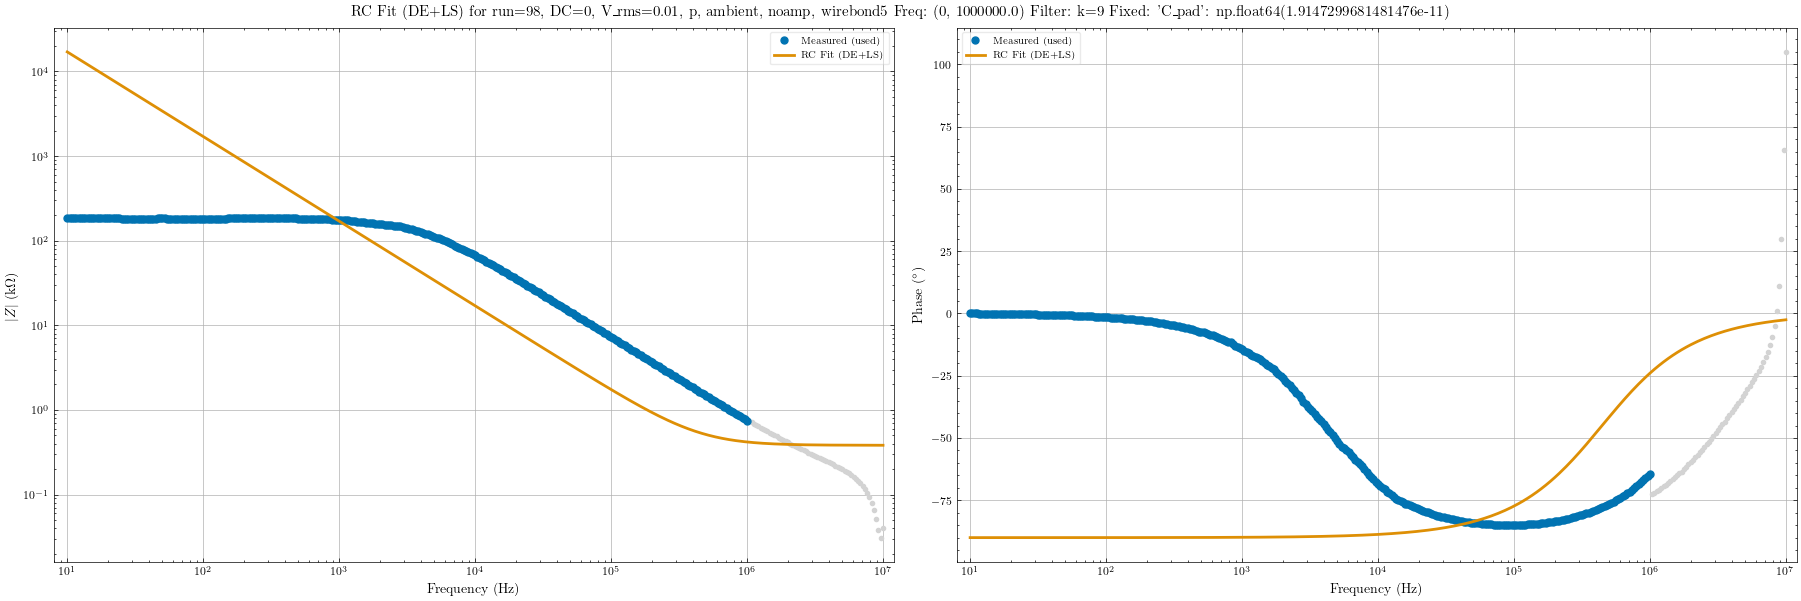


Final Fitted Parameters Dictionary:
{'C_pad': np.float64(1.9147299681481476e-11), 'R_mem1': np.float64(41829615501804.195), 'C_mem1': np.float64(9.16132653200732e-10), 'R_series': np.float64(382.32826428363023)}
--- Fit finished for: run=98, DC=0, V_rms=0.01, p, ambient, noamp, wirebond5 ---


In [20]:
# ------------------------------ Fitting ------------------------------

# --- Settings ---
fit_settings = {
    'model_type': 'RC', # String: 'RC', 'CPE', 'RC2', or 'CPE2'
    'freq_bounds': (0, 1e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 9, # Median filter kernel (or 0/None to skip)
    'fixed_params': {'C_pad': np.float64(1.9147299681481476e-11)}, #{'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    'plot_type': 'Zabsphi', # Plot type: 'Zrealimag' or 'Zabsphi'
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict': {'R_mem1': (1e1, 1e14), 'C_mem1': (1e-13, 1e-9),'R_mem2': (1e1, 1e14), 'C_mem2': (1e-13, 1e-11),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)},
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 6000000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 300000 # Max function evaluations for Least Squares. Increase if refinement terminates early.
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']

# --- Select Data ---
# Select data 
data_to_fit  = [solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ]
# extract a single DC level from the data
#dfit = extract_single_dc(dfit, DC_val=0)

for dat in data_to_fit:
    # --- Run Fit ---
    fig, ax = fit_impedance_data(dat, **fit_settings)




/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


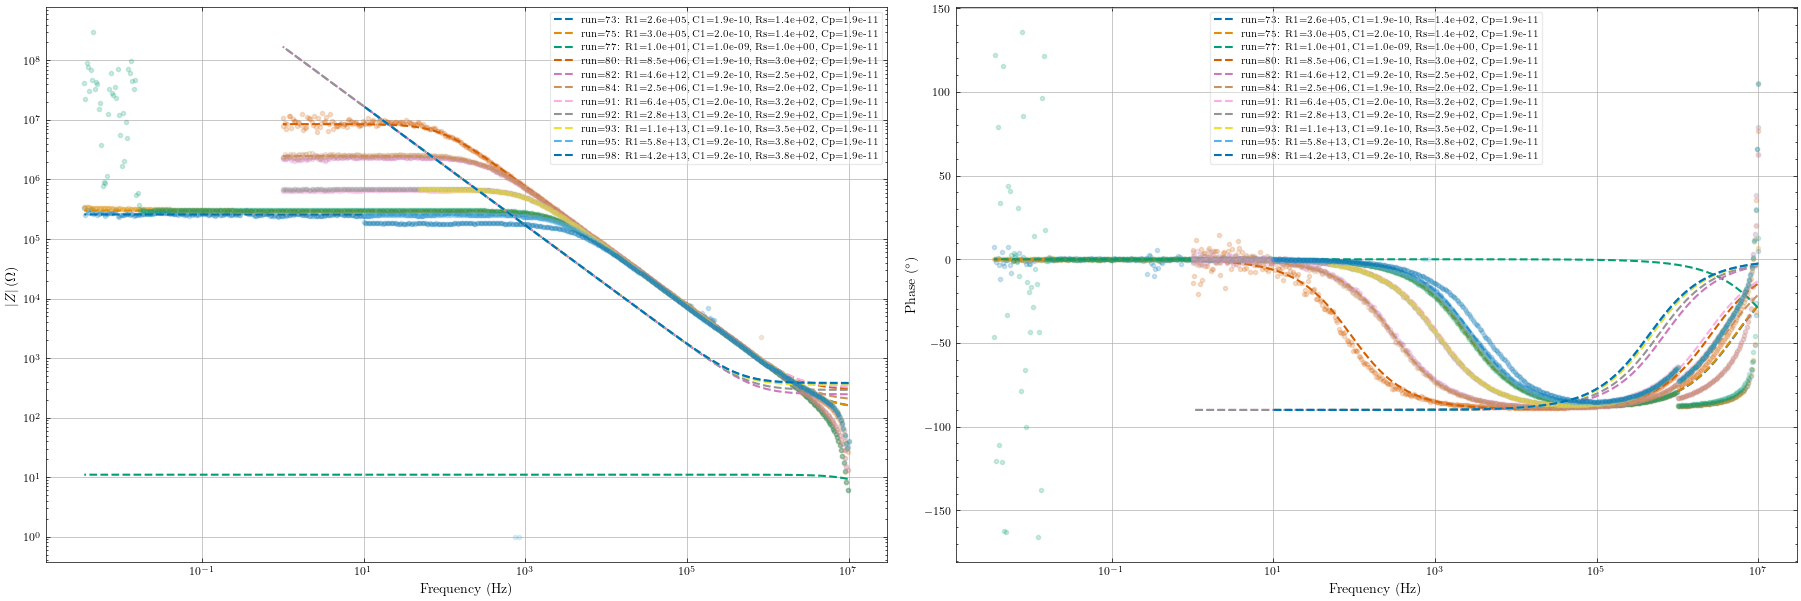

In [21]:
# ---------------------------------------- Plotting the Fitting ------------------------------
# Select data 
d69 = [solatron[73][0], solatron[75][0], solatron[77][0], solatron[80][0], solatron[82][0], solatron[84][0], solatron[91][0], solatron[92][0], solatron[93][0], solatron[95][0], solatron[98][0] ]

# Labels
plot_labels = ['wb6, pristine, ambient', 'wb6, eformed, ambient '] # label for the legend
plot_filename = 'wb6_pristine_vs_forming' # name for exported figure
plot_title = 'Electroforming vs Pristine' # title for powerpoint

# Notes
notes = [''] # notes for the powerpoint in text box

# if export true, update the plot string
d69 = update_plot_string(d69, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d69, d_type='Zabsphi', freq_lim=[1e-3, 1e7], y_lim_right=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 1, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Exporting

### Exporting All Figures as Individual Files

In [18]:
if export_data:
    for fig_obj, fig_name, fig_title, notes in fig_list:
        save_path = Path(output_IS_solatron) / Path(f"{fig_name}_{powerpoint_string}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)

### Exporting to Powerpoint

In [19]:
if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

   

    # define the path to the output directory
    path_out = output_IS_solatron

    # Add each figure to the PowerPoint presentation if it exists
    for fig, fig_name, title, notes in fig_list:
        add_slide(fig, title, notes, prs, path_out = path_out)

    # Save the PowerPoint presentation
    prs.save(Path(path_out) / Path(f'{powerpoint_string}.pptx'))